# FPTAS - 0/1 Knaspack (with volume constraint)

In [1]:
import numpy as np
from pprint import pprint

In [50]:
def generate_instance(n):
    b = n*4 + np.random.randint(-n//5, n//5)
    v = n*4 + np.random.randint(-n//5, n//5)
    
    profits = np.random.randint(1, n*3, size=n)
    weights = np.random.randint(b//n, b, size=n)
    volumes = np.random.randint(v//n, v, size=n)
    
    return b, v, profits, weights, volumes

In [3]:
def base_capacity(p, w, v, s):
    if s[0] < w or s[1] < v:
        return (0,)
    return (p,)

def base_profit(p, w, v, s):
    if s[0] == p:
        return (w, v)
    if s[0] == 0:
        return (0, 0)
    return (np.inf, np.inf)

In [64]:
import itertools

#dimensions = {
#    'names': ['n', 'weight', 'volume'],
#    'target': ['profit']
#    'values': [4, 14, 10]
#}

#dimensions = {
#    'name': ['n', 'profit'],
#    'target': ['weight', 'volume']
#    'values': [4, sum(profits)]
#}

#objects = {
#    'num': 4,
#    'profit': [...],
#    'weight': [...],
#    'volume': [...]
#}

def not_fits(S, V):
    for s,v in zip(S,V):
        if v > s:
            return True
    return False

def max_tuple(t1, t2):
    n1 = np.linalg.norm(t1)
    n2 = np.linalg.norm(t2)
    
    if n1 >= n2:
        return t1, 0
    return t2, 1

def min_tuple(t1, t2):
    n1 = np.linalg.norm(t1)
    n2 = np.linalg.norm(t2)
    
    if n1 <= n2:
        return t1, 0
    return t2, 1

def solve_instance(dimensions: dict, objects, base=base_capacity, criterion=max_tuple):
    n = objects['num']
    
    table = np.full(dimensions['values'], 0 if criterion == max_tuple else np.inf, dtype=np.object)
    backtrack = np.zeros(dimensions['values'], dtype=np.object)
    #print(f'Shape of table: {table.shape}')
    
 
    indices = map(lambda ax: range(0, ax), dimensions['values'][1:])
    for s in itertools.product(*indices):
        table[n-1][s] = base(objects['profit'][n-1], 
                             objects['weight'][n-1], 
                             objects['volume'][n-1], 
                             s)
        backtrack[n-1][s] = 0 if table[n-1][s][0] == 0 or table[n-1][s][0] == np.inf else 1
        
    for i in range(n-2, -1, -1):
        indices = map(lambda ax: range(0, ax), dimensions['values'][1:])
        for s in itertools.product(*indices):
            values = []
            for dim_name in dimensions['names'][1:]:
                values.append(objects[dim_name][i])   
            
            if not_fits(s, values):
                table[i][s] = table[i+1][s]
                backtrack[i][s] = 0
            else:
                targets = []
                for dim_name in dimensions['target']:
                    targets.append(objects[dim_name][i])
                
                table[i][s], backtrack[i][s] = criterion(table[i+1][s], 
                                                        tuple(np.add(targets, table[i+1][tuple(np.subtract(s, values))])))
                
    return table, backtrack

def construct_solution(dimensions, table, backtrack, objects, upper_bound=None):
    max_index = None
    solution = [0]*objects['num']
    
    if not upper_bound:
        max_index = (dimensions['values'][1]-1, dimensions['values'][2]-1)
    else:
        for max_index in range(len(table[0])-1, -1, -1):
            values = table[0][max_index]
            if not not_fits(upper_bound, values):
                break
    
    for var in range(0, objects['num']):
        curr_var = backtrack[var][max_index]
        #print(curr_var)
        if curr_var == 1:
            solution[var] = 1
            
            if not upper_bound:
                max_index = tuple(np.subtract(max_index, (objects['weight'][var], objects['volume'][var])))
            else:
                max_index -= objects['profit'][var]
    return solution   

In [34]:
n = 5
b, v, profits, weights, volumes = generate_instance(n)

print(b)
print(profits)
print(weights)

12
[8, 12, 7, 15, 10]
[4, 9, 3, 6, 2]


In [27]:
dimensions = {
    'names': ['n', 'weight', 'volume'],
    'target': ['profit'],
    'values': (n, b+1, v+1)
}


objects = {
    'num': n,
    'profit': profits,
    'weight': weights,
    'volume': volumes
}


table, backtrack = solve_instance(dimensions, objects, base=base_capacity, criterion=max_tuple)
#table, backtrack = solve_instance(dimensions, objects, base=base_profit, criterion=min_tuple)

Shape of table: (5, 13, 11)


In [28]:
pprint(table)

array([[[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,),
         (0,)],
        [(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,),
         (0,)],
        [(10,), (10,), (10,), (10,), (10,), (10,), (10,), (10,), (10,),
         (10,), (10,)],
        [(10,), (10,), (10,), (10,), (10,), (10,), (10,), (10,), (10,),
         (10,), (10,)],
        [(10,), (10,), (10,), (10,), (10,), (10,), (10,), (10,), (10,),
         (10,), (10,)],
        [(17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,), (17,),
         (17,), (17,)],
        [(18,), (18,), (18,), (18,), (18,), (18,), (18,), (18,), (18,),
         (18,), (18,)],
        [(18,), (18,), (18,), (18,), (18,), (18,), (18,), (18,), (18,),
         (18,), (18,)],
        [(25,), (25,), (25,), (25,), (25,), (25,), (25,), (25,), (25,),
         (25,), (25,)],
        [(25,), (25,), (25,), (25,), (25,), (25,), (25,), (25,), (25,),
         (25,), (25,)],
        [(25,), (25,), (25,), (25,), (25,), (25,), (25,), (25,

In [29]:
pprint(backtrack)

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [

In [30]:
construct_solution(dimensions, table, backtrack, objects)

[1, 0, 0, 1, 1]

In [46]:
import copy

def fptas(w, v, objects, epsilon=3./4.):
    p_max = max(objects['profit'])
    k = np.ceil((epsilon*p_max) / objects['num'])
    #print(f'k={k}')
    p_scaled = np.floor_divide(np.array(objects['profit']), k)
    p_scaled = np.uint32(p_scaled).tolist()
    
    objects_scaled = copy.deepcopy(objects)
    objects_scaled['profit'] = p_scaled
   
    
    dimensions = {
        'names': ['n', 'profit'],
        'target': ['weight'], #, 'volume'],
        'values': (objects['num'], int(sum(p_scaled))+1)
    }
    table, backtrack = solve_instance(dimensions, objects_scaled, base=base_profit, criterion=min_tuple)
    solution = construct_solution(dimensions, table, backtrack, objects_scaled, upper_bound=(w,))
    
    #print(table)
    #print(backtrack)
    
    return solution

In [37]:
solution_appr = fptas(b, v, objects)

k=2.25
Shape of table: (5, 22)


In [39]:
print(solution_appr)

[0, 0, 1, 1, 1]


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [66]:
import time

min_n = 4
max_n = 30

time_dp = list()
time_fptas = list()

for n in range(min_n, max_n+1):
    b, v, profits, weights, volumes = generate_instance(n)
    
    dimensions = {
        'names': ['n', 'weight', 'volume'],
        'target': ['profit'],
        'values': (n, b+1, v+1)
    }


    objects = {
        'num': n,
        'profit': profits,
        'weight': weights,
        'volume': volumes
    }
    
    start = time.time()
    table, backtrack = solve_instance(dimensions, objects, base=base_capacity, criterion=max_tuple)
    duration = (time.time()-start)*1000.
    time_dp.append(duration)
    
    start = time.time()
    appr = fptas(b, v, objects)
    duration = (time.time()-start)*1000.
    time_fptas.append(duration)
    
    print(f'n={n}, time_dp={time_dp[-1]:.2f}ms, time_fptas={time_fptas[-1]:.2f}ms')

k=3.0
n=4, time_dp=21.58ms, time_fptas=2.62ms
k=3.0
n=5, time_dp=32.18ms, time_fptas=5.36ms
k=3.0
n=6, time_dp=49.09ms, time_fptas=4.73ms
k=3.0
n=7, time_dp=93.98ms, time_fptas=5.06ms
k=2.0
n=8, time_dp=144.46ms, time_fptas=16.40ms
k=2.0
n=9, time_dp=186.88ms, time_fptas=27.66ms
k=3.0
n=10, time_dp=242.51ms, time_fptas=41.61ms
k=3.0
n=11, time_dp=362.62ms, time_fptas=47.74ms
k=2.0
n=12, time_dp=427.35ms, time_fptas=60.87ms
k=3.0
n=13, time_dp=721.18ms, time_fptas=75.46ms
k=3.0
n=14, time_dp=752.13ms, time_fptas=68.82ms
k=3.0
n=15, time_dp=786.98ms, time_fptas=69.09ms
k=2.0
n=16, time_dp=1106.33ms, time_fptas=196.65ms
k=3.0
n=17, time_dp=1337.03ms, time_fptas=120.50ms
k=2.0
n=18, time_dp=1302.57ms, time_fptas=164.27ms
k=2.0
n=19, time_dp=2438.38ms, time_fptas=183.80ms
k=3.0
n=20, time_dp=2778.94ms, time_fptas=193.52ms
k=3.0
n=21, time_dp=2213.50ms, time_fptas=209.89ms
k=3.0
n=22, time_dp=3164.24ms, time_fptas=356.49ms
k=3.0
n=23, time_dp=3748.31ms, time_fptas=366.41ms
k=3.0
n=24, time_d

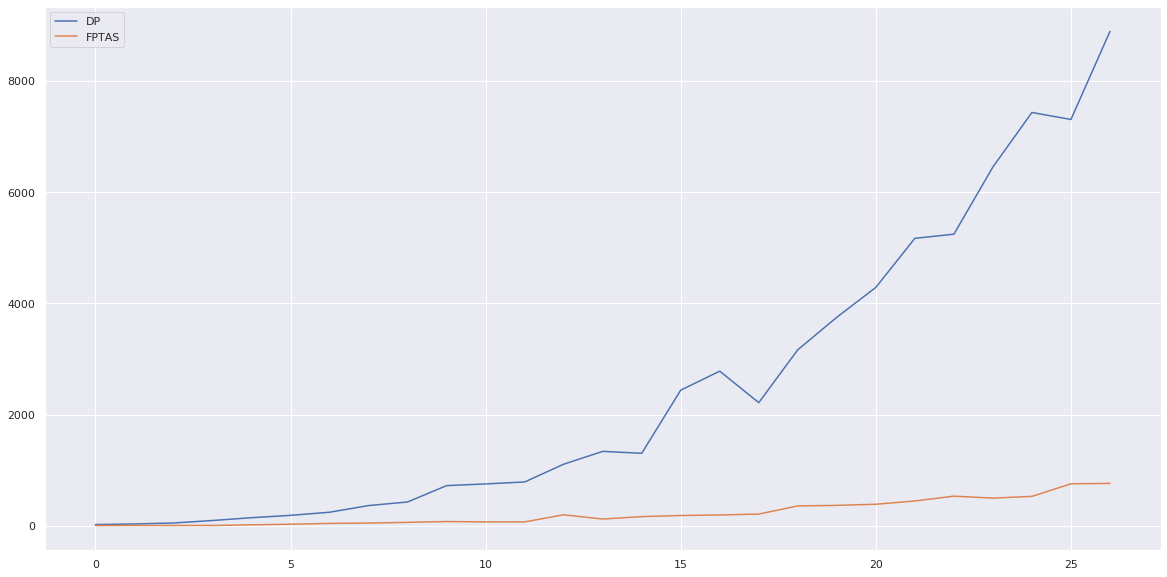

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(time_dp, label='DP')
plt.plot(time_fptas, label='FPTAS')
plt.legend()
plt.show()